# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time


---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [ ]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
n: np.ndarray = ...
n_memory_size = n.nbytes

s: sp.sparse.csc_array = ...
s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes

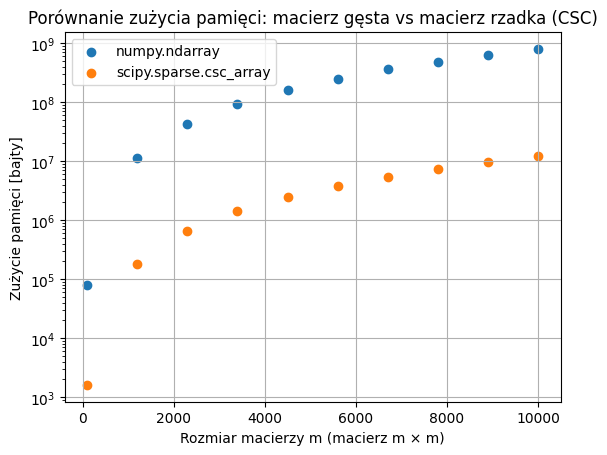

In [8]:
# ===== Twoja implementacja tutaj =====
# 10 wartości m
m_values = np.linspace(100, 10000, 10, dtype=int)

dense_sizes = []
sparse_sizes = []

for m in m_values:
    A_csc = sp.sparse.random_array((m, m), density=0.01, format='csc', dtype=np.float64)

    A_dense = A_csc.toarray()

    size_csc = (
        A_csc.data.nbytes +
        A_csc.indices.nbytes +
        A_csc.indptr.nbytes
    )

    size_dense = A_dense.nbytes

    sparse_sizes.append(size_csc)
    dense_sizes.append(size_dense)

plt.figure()
plt.scatter(m_values, dense_sizes, label='numpy.ndarray')
plt.scatter(m_values, sparse_sizes, label='scipy.sparse.csc_array')
plt.xlabel('Rozmiar macierzy m (macierz m × m)')
plt.ylabel('Zużycie pamięci [bajty]')
plt.title('Porównanie zużycia pamięci: macierz gęsta vs macierz rzadka (CSC)')
plt.legend()
plt.grid(True)
plt.semilogy()
plt.show()


---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

Wynika to z ilości danych do przeliczenia, przy macierzach rzadkich mozna pominąć wiele zer co przyśpiesza znacząco obliczenia wykonywane przez zoptymalizowane bibioteki.

In [10]:
# ===== Twoja implementacja tutaj =====
rng = np.random.default_rng(123)
m = 1000
A_csc = sp.sparse.random_array((m, m), density=0.01, format='csc', random_state=rng, dtype=np.float64,)
B_csc = sp.sparse.random_array((m, m), density=0.01, format='csc', random_state=rng, dtype=np.float64,)

A_dense = A_csc.toarray()
B_dense = B_csc.toarray()
def measure_time(func, repeats=5):
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        func()
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return np.mean(times)

def dense_mul():
    C_dense = A_dense @ B_dense

dense_time = measure_time(dense_mul)

def sparse_mul():
    C_sparse = A_csc @ B_csc

sparse_time = measure_time(sparse_mul)

print(f"Czas mnożenia (gęste, numpy.ndarray): {dense_time:.6f} s")
print(f"Czas mnożenia (rzadkie, csc_array):   {sparse_time:.6f} s")

Czas mnożenia (gęste, numpy.ndarray): 0.044311 s
Czas mnożenia (rzadkie, csc_array):   0.001183 s


---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


Zmniejszanie rtol prowadzi do uzyskiwania mniejszej normy residuum, ponieważ metoda CG dąży wtedy do dokładniejszego rozwiązania. Po osiągnięciu bardzo małych wartości rtol poprawa staje się minimalna i krzywa się wypłaszcza.

Zwiększanie maxiter początkowo znacząco zmniejsza residuum, gdyż metoda ma więcej iteracji na poprawę rozwiązania. Po przekroczeniu pewnej liczby iteracji dalsze zwiększanie maxiter nie daje już korzyści, ponieważ metoda osiągnęła wymaganą dokładność.

In [5]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_upper_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags)
        matrix = diags_array(
            diagonal_values, offsets=np.arange(1, num_upper_diags + 1), shape=(m, m)
        )
        matrix = matrix + matrix.T
    else:
        num_upper_diags = np.random.randint(2, m // 2)
        num_lower_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags + num_lower_diags)
        matrix = diags_array(
            diagonal_values,
            offsets=np.arange(-num_lower_diags, num_upper_diags),
            shape=(m, m),
        )

    row_sums = np.asarray(matrix.sum(axis=1)).flatten()
    diagonal_vals = row_sums - np.abs(matrix.diagonal()) + np.random.rand(m)
    matrix.setdiag(diagonal_vals)

    return matrix.tocsc()


def is_diagonally_dominant(A: np.ndarray | sp.sparse.csc_array) -> bool | None:
    """Funkcja sprawdzająca czy podana macierz jest diagonalnie zdominowana.

    Args:
        A (np.ndarray | sp.sparse.csc_array): Macierz A (m,m) podlegająca 
            weryfikacji.
    
    Returns:
        (bool): `True`, jeśli macierz jest diagonalnie zdominowana, 
            w przeciwnym wypadku `False`.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not isinstance(A, (np.ndarray, sp.sparse.csc_array)):
        return None

    if A.ndim != 2:
        return None

    m, n = A.shape
    if m != n:
        return None

    if isinstance(A, np.ndarray):
        absA = np.abs(A)
        row_sums = absA.sum(axis=1)
        diag = np.abs(np.diag(A))
        return bool(np.all(diag > (row_sums - diag)))
    
    absA = abs(A)
    row_sums = np.array(absA.sum(axis=1)).ravel()
    diag = np.abs(absA.diagonal())
    return bool(np.all(diag > (row_sums - diag)))


def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    """Funkcja obliczająca normę residuum dla równania postaci: 
    Ax = b.

    Args:
        A (np.ndarray): Macierz A (m,n) zawierająca współczynniki równania.
        x (np.ndarray): Wektor x (n,) zawierający rozwiązania równania.
        b (np.ndarray): Wektor b (m,) zawierający współczynniki po prawej 
            stronie równania.
    
    Returns:
        (float): Wartość normy residuum dla podanych parametrów.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not isinstance(A, np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b, np.ndarray):
        return None

    if A.ndim != 2 or x.ndim != 1 or b.ndim != 1:
        return None

    m, n = A.shape
    if x.shape[0] != n or b.shape[0] != m:
        return None

    try:
        r = A @ x - b
    except Exception:
        return None
    
    return float(np.linalg.norm(r, ord=2))

Czy A jest diagonalnie zdominowana?: True
rtol = 1.0e-02, info = 0, ||Ax - b||_2 = 1.261e-01
rtol = 8.6e-04, info = 0, ||Ax - b||_2 = 1.504e-02
rtol = 7.4e-05, info = 0, ||Ax - b||_2 = 3.840e-04
rtol = 6.3e-06, info = 0, ||Ax - b||_2 = 1.116e-04
rtol = 5.4e-07, info = 0, ||Ax - b||_2 = 4.245e-06
rtol = 4.6e-08, info = 0, ||Ax - b||_2 = 4.062e-07
rtol = 4.0e-09, info = 0, ||Ax - b||_2 = 2.861e-08
rtol = 3.4e-10, info = 0, ||Ax - b||_2 = 2.895e-09
rtol = 2.9e-11, info = 0, ||Ax - b||_2 = 1.518e-10
rtol = 2.5e-12, info = 0, ||Ax - b||_2 = 3.348e-11
rtol = 2.2e-13, info = 0, ||Ax - b||_2 = 1.830e-12
rtol = 1.8e-14, info = 0, ||Ax - b||_2 = 8.919e-14
rtol = 1.6e-15, info = 0, ||Ax - b||_2 = 2.231e-14
rtol = 1.4e-16, info = 0, ||Ax - b||_2 = 9.879e-15
rtol = 1.2e-17, info = 0, ||Ax - b||_2 = 9.866e-15
rtol = 1.0e-18, info = 0, ||Ax - b||_2 = 9.866e-15


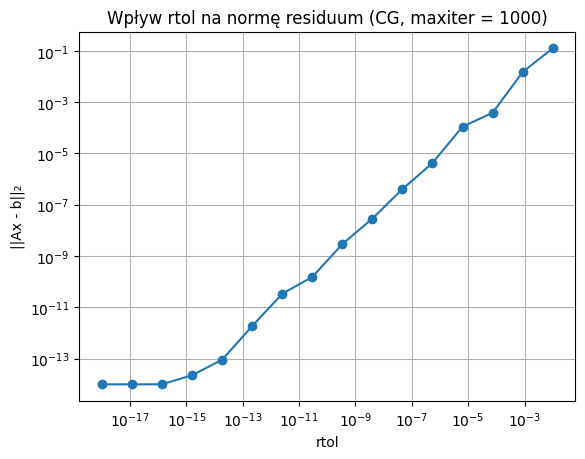

maxiter = 10, info = 10, ||Ax - b||_2 = 1.116e-04
maxiter = 60, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 110, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 160, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 210, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 260, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 310, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 360, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 410, info = 0, ||Ax - b||_2 = 1.107e-07
maxiter = 460, info = 0, ||Ax - b||_2 = 1.107e-07


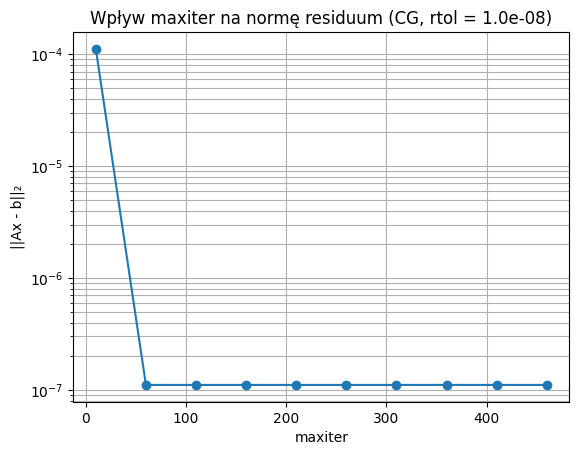

In [14]:
# ===== Twoja implementacja tutaj =====
A = generate_matrix(m=1000, is_symmetric=True)
print("Czy A jest diagonalnie zdominowana?:", is_diagonally_dominant(A))
b = np.random.rand(1000)
A_dense = A.toarray()



rtol_values = np.logspace(-2, -18, 16)
maxiter_fixed = 1000

residuals_rtol = []

for rtol in rtol_values:
    x, info = sp.sparse.linalg.cg(A, b, rtol=rtol, maxiter=maxiter_fixed)
    res = residual_norm(A_dense, x, b)
    residuals_rtol.append(res)
    print(f"rtol = {rtol:.1e}, info = {info}, ||Ax - b||_2 = {res:.3e}")

plt.figure()
plt.loglog(rtol_values, residuals_rtol, marker="o")
plt.xlabel("rtol")
plt.ylabel("||Ax - b||₂")
plt.title("Wpływ rtol na normę residuum (CG, maxiter = 1000)")
plt.grid(True, which="both")
plt.show()



maxiter_values = np.arange(10, 510, 50)
rtol_fixed = 1e-8
residuals_maxiter = []
for maxiter in maxiter_values:
    x, info = sp.sparse.linalg.cg(A, b, rtol=rtol_fixed, maxiter=maxiter)
    res = residual_norm(A_dense, x, b)
    residuals_maxiter.append(res)
    print(f"maxiter = {maxiter}, info = {info}, ||Ax - b||_2 = {res:.3e}")

plt.figure()
plt.semilogy(maxiter_values, residuals_maxiter, marker="o")
plt.xlabel("maxiter")
plt.ylabel("||Ax - b||₂")
plt.title(f"Wpływ maxiter na normę residuum (CG, rtol = {rtol_fixed:.1e})")
plt.grid(True, which="both")
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)